# **Equity Fund Analysis (D598)**

This notebook performs financial data analysis for 150 U.S. companies.

# **Contents**
### Task 2: Coding
- Import dataset
- Identify duplicates
- Group by state with descriptive statistics
- Filter negative debt-to-equity ratios
- Create debt-to-income ratio
- Concatenating results into final dataframe
Save results
### Task 3: Presentation
- Code explanation
- Visualizations
- Result interpretation

In [58]:
# Loading the necessary libraries
import pandas as pd # Data manipulation
import numpy as np # Numerical computations
import datetime as dt # Date and time handling
import matplotlib.pyplot as plt # Data visualization
%matplotlib inline 
import seaborn as sns # Statistical data visualization

# Improve aesthetics
sns.set(style="whitegrid", palette="muted") # Set seaborn style

# Warnings
import warnings # To manage warnings
warnings.filterwarnings('ignore') # To ignore warnings

# **Task 2 - Coding**

## **Import Dataset**

In [59]:
# Import the dataset
df = pd.read_excel("D598 Data Set.xlsx")

# Preview the dataset
df.head()

,Business ID,Business State,Total Long-term Debt,Total Equity,Debt to Equity,Total Liabilities,Total Revenue,Profit Margin
0,41872013,Kentucky,16889000.0,18046000.0,0.935886,25986000.0,136753000,0.023663
1,76232013,Iowa,6252000.0,18293621.0,0.341758,14474000.0,34226553,0.265015
2,160992013,Texas,19200000.0,177858000.0,0.107951,72787000.0,384196000,0.130413
3,197452013,Delaware,117592000.0,278773000.0,0.421820,558749000.0,444306000,0.196768
4,241042013,Illinois,4408000.0,52064000.0,0.084665,19898000.0,121541000,0.168305


## **Identifying Duplicates**

In [60]:
# Identify duplicate rows
duplicates = df[df.duplicated()]

print("Number of duplicate rows:", len(duplicates))
duplicates.head()

Number of duplicate rows: 0


,Business ID,Business State,Total Long-term Debt,Total Equity,Debt to Equity,Total Liabilities,Total Revenue,Profit Margin


## **Descriptive Statistics Group by State**

In [61]:
# Grouping all the data by "Business State" and calculating descriptive statistics
df_stats = df.groupby("Business State").agg(['mean','median','min','max'])
df_stats.head()

Business ID                                         \
                        mean        median         min          max   
Business State                                                        
Alabama         1.599117e+09  1.599117e+09   422282013   2775952013   
Arizona         9.445082e+09  9.445082e+09  9445082013   9445082013   
Arkansas        8.411162e+09  8.411162e+09  7982872013   8839452013   
California      1.063053e+10  1.034300e+10  7192742013  14733342013   
Colorado        9.966963e+09  1.008177e+10  3194582013  14214612013   

               Total Long-term Debt                                         \
                               mean       median         min           max   
Business State                                                               
Alabama                6.743890e+08  674389000.0   5314000.0  1.343464e+09   
Arizona                6.508800e+07   65088000.0  65088000.0  6.508800e+07   
Arkansas               8.960450e+07   89604500.0  70366000.0  1.088430e+08   
California             3.273964e+07    4721500.0     15000.0  3.349970e+08   
Colorado               8.470025e+07   29327000.0   3375000.0  3.753220e+08   

                Total Equity                ... Total Liabilities  \
                        mean        median  ...               min   
Business State                              ...                     
Alabama         1.441039e+09  1.441039e+09  ...        23698000.0   
Arizona         5.915300e+07  5.915300e+07  ...       110938000.0   
Arkansas        1.082420e+08  1.082420e+08  ...       213356000.0   
California      4.535982e+07  1.427150e+07  ...         2658000.0   
Colorado        2.007589e+08  6.077850e+07  ...         6787000.0   

                             Total Revenue                          \
                         max          mean       median        min   
Business State                                                       
Alabama         3.764193e+09  6.968309e+08  696830858.0  137344716   
Arizona         1.109380e+08  2.155800e+08  215580000.0  215580000   
Arkansas        2.144080e+08  4.789090e+08  478909000.0  402813000   
California      7.888110e+08  8.869559e+07   37531500.0    1100539   
Colorado        5.822750e+08  2.486542e+08  202399000.0    7616000   

                           Profit Margin                                
                       max          mean    median       min       max  
Business State                                                          
Alabama         1256317000      0.403732  0.403732  0.297094  0.510371  
Arizona          215580000      0.206902  0.206902  0.206902  0.206902  
Arkansas         555005000      0.098319  0.098319  0.073156  0.123482  
California       276869000      0.287947  0.301992 -0.084923  0.505955  
Colorado         696473000      0.346033  0.314631  0.124017  0.655796  

[5 rows x 28 columns]

In [62]:
# Group by state and run descriptive statistics using specific column names
state_stats = df.groupby("Business State").agg(
    {
        "Total Revenue": ["mean", "median", "min", "max"],
        "Total Long-term Debt": ["mean", "median", "min", "max"],
        "Total Equity": ["mean", "median", "min", "max"],
        "Debt to Equity": ["mean", "median", "min", "max"]
    }
).reset_index()

state_stats.head()

Business State Total Revenue                                      \
                          mean       median        min         max   
0        Alabama  6.968309e+08  696830858.0  137344716  1256317000   
1        Arizona  2.155800e+08  215580000.0  215580000   215580000   
2       Arkansas  4.789090e+08  478909000.0  402813000   555005000   
3     California  8.869559e+07   37531500.0    1100539   276869000   
4       Colorado  2.486542e+08  202399000.0    7616000   696473000   

  Total Long-term Debt                                         Total Equity  \
                  mean       median         min           max          mean   
0         6.743890e+08  674389000.0   5314000.0  1.343464e+09  1.441039e+09   
1         6.508800e+07   65088000.0  65088000.0  6.508800e+07  5.915300e+07   
2         8.960450e+07   89604500.0  70366000.0  1.088430e+08  1.082420e+08   
3         3.273964e+07    4721500.0     15000.0  3.349970e+08  4.535982e+07   
4         8.470025e+07   29327000.0   3375000.0  3.753220e+08  2.007589e+08   

                                           Debt to Equity                      \
         median          min           max           mean    median       min   
0  1.441039e+09   24058479.0  2.858019e+09       0.345473  0.345473  0.220878   
1  5.915300e+07   59153000.0  5.915300e+07       1.100333  1.100333  1.100333   
2  1.082420e+08  100538000.0  1.159460e+08       0.844746  0.844746  0.606886   
3  1.427150e+07  -15691000.0  3.211750e+08       0.169920  0.154170 -1.374036   
4  6.077850e+07   12845248.0  9.339710e+08       0.619971  0.874711  0.050710   

             
        max  
0  0.470068  
1  1.100333  
2  1.082606  
3  1.043036  
4  1.058488

## **Filter businesses with negative debt-to-equity ratios**

In [63]:
# Filter businesses with negative debt-to-equity ratios
negative_de = df[df["Debt to Equity"] < 0]

print("Number of businesses with negative D/E:", len(negative_de))
negative_de.head()

Number of businesses with negative D/E: 7


,Business ID,Business State,Total Long-term Debt,Total Equity,Debt to Equity,Total Liabilities,Total Revenue,Profit Margin
18,934562013,Ohio,263880000.0,-111297000.0,-2.370953,592174000.0,719783000,0.320697
57,8343652013,Washington,10603000.0,-13271658.0,-0.798921,16625000.0,8949401,0.448119
87,9323722013,California,21560000.0,-15691000.0,-1.374036,30048000.0,37782000,0.505955
109,10919832013,Utah,2010000.0,-3602481.0,-0.557949,6302000.0,17757388,0.732562
117,11245242013,California,556000.0,-2063203.0,-0.269484,3819000.0,1100539,-0.084923


## **Create Debt-to-Income Ratio (DTI)**

In [64]:
# Create Debt-to-Income Ratio (DTI)

def calc_dti(row):
    if row["Total Revenue"] == 0:
        return 0 if row["Total Long-term Debt"] == 0 else 1
    return row["Total Long-term Debt"] / row["Total Revenue"]

df["Debt-to-Income Ratio"] = df.apply(calc_dti, axis=1)

df.head()

,Business ID,Business State,Total Long-term Debt,Total Equity,Debt to Equity,Total Liabilities,Total Revenue,Profit Margin,Debt-to-Income Ratio
0,41872013,Kentucky,16889000.0,18046000.0,0.935886,25986000.0,136753000,0.023663,0.123500
1,76232013,Iowa,6252000.0,18293621.0,0.341758,14474000.0,34226553,0.265015,0.182665
2,160992013,Texas,19200000.0,177858000.0,0.107951,72787000.0,384196000,0.130413,0.049974
3,197452013,Delaware,117592000.0,278773000.0,0.421820,558749000.0,444306000,0.196768,0.264664
4,241042013,Illinois,4408000.0,52064000.0,0.084665,19898000.0,121541000,0.168305,0.036268


## **Concatenate into final dataframe**

In [65]:
# Concatenate into final dataframe
final_df = df.copy()
final_df.head()

,Business ID,Business State,Total Long-term Debt,Total Equity,Debt to Equity,Total Liabilities,Total Revenue,Profit Margin,Debt-to-Income Ratio
0,41872013,Kentucky,16889000.0,18046000.0,0.935886,25986000.0,136753000,0.023663,0.123500
1,76232013,Iowa,6252000.0,18293621.0,0.341758,14474000.0,34226553,0.265015,0.182665
2,160992013,Texas,19200000.0,177858000.0,0.107951,72787000.0,384196000,0.130413,0.049974
3,197452013,Delaware,117592000.0,278773000.0,0.421820,558749000.0,444306000,0.196768,0.264664
4,241042013,Illinois,4408000.0,52064000.0,0.084665,19898000.0,121541000,0.168305,0.036268


## **Save outputs**

In [66]:
# Save the results to Excel files
duplicates.to_excel("Duplicates.xlsx", index=False)
df_stats.to_excel("State_Statistics.xlsx")
negative_de.to_excel("Negative_DE_Ratio.xlsx", index=False)
final_df.to_excel("Final_Data_with_DTI.xlsx", index=False)

print("Files saved successfully!")

Files saved successfully!


# **Task 3 – Presentation: Data Visualizations**

### **Explanation of Task 2 Code**

The program begins by importing the **Pandas** library, which is essential for handling and analyzing tabular data in Python. Pandas provides powerful tools for reading data, cleaning it, and generating meaningful summaries, making it the right choice for financial analysis.

The first step is to **load the dataset** using `pd.read_excel("D598 Data Set.xlsx")`. This command reads the Excel file into a Pandas DataFrame named `df`, which functions like an in-memory spreadsheet. At this stage, the data is ready for inspection and transformation.

Next, the program checks for **duplicate rows** using the `.duplicated()` function. Duplicates are stored in a separate DataFrame called `duplicates`. Identifying and removing duplicate records is important for ensuring that results are accurate and not skewed by repeated entries.

The third step involves creating **summary statistics by state**. Using the `.groupby("Business State")` method, the dataset is grouped according to the state where each business is located. For each state, descriptive statistics (mean, median, minimum, and maximum) are calculated for several numeric variables, including revenue, long-term debt, equity, and the debt-to-equity ratio. This produces a new DataFrame called `state_stats`, which allows fund managers to compare financial performance across different states.

After summarizing the data, the program identifies businesses with **negative debt-to-equity ratios**. A simple filter, `df[df["Debt-to-Equity Ratio"] < 0]`, extracts all rows where this financial measure is less than zero. A negative ratio typically signals negative equity, meaning liabilities exceed assets — a strong warning sign about a company’s financial health.

The next step introduces a new financial measure: the **Debt-to-Income Ratio (DTI)**, defined as long-term debt divided by revenue. A custom function, `calc_dti()`, is written to safely compute this ratio while handling potential divide-by-zero errors. If revenue is zero and debt is also zero, the ratio is set to 0, representing no debt burden. If revenue is zero but debt exists, the ratio is set to 1, representing extreme financial risk. Otherwise, the ratio is calculated normally as debt divided by revenue. This function is applied row by row across the dataset, and the resulting values are stored in a new column called `"Debt-to-Income Ratio"`.

Once the new column has been added, the updated DataFrame is saved as `final_df`. At this point, the dataset contains all of the original information along with the newly calculated DTI measure, making it more useful for analysis and decision-making.

Finally, the program **exports results to Excel files** for stakeholder review. Four files are created:

* `Duplicates.xlsx` contains any duplicate rows for cleaning purposes.
* `State_Statistics.xlsx` provides descriptive statistics by state.
* `Negative_DE_Ratio.xlsx` lists all companies with negative debt-to-equity ratios.
* `Final_Data_with_DTI.xlsx` holds the complete dataset with the added DTI column.

By structuring the workflow in this way, the program transforms raw financial data into actionable insights. It ensures data quality, summarizes company performance across states, highlights risky firms with negative equity, introduces an additional financial ratio for deeper analysis, and prepares outputs in a format that stakeholders can easily access without needing to run code themselves.

## **Visualization 1 – Average Revenue by State**

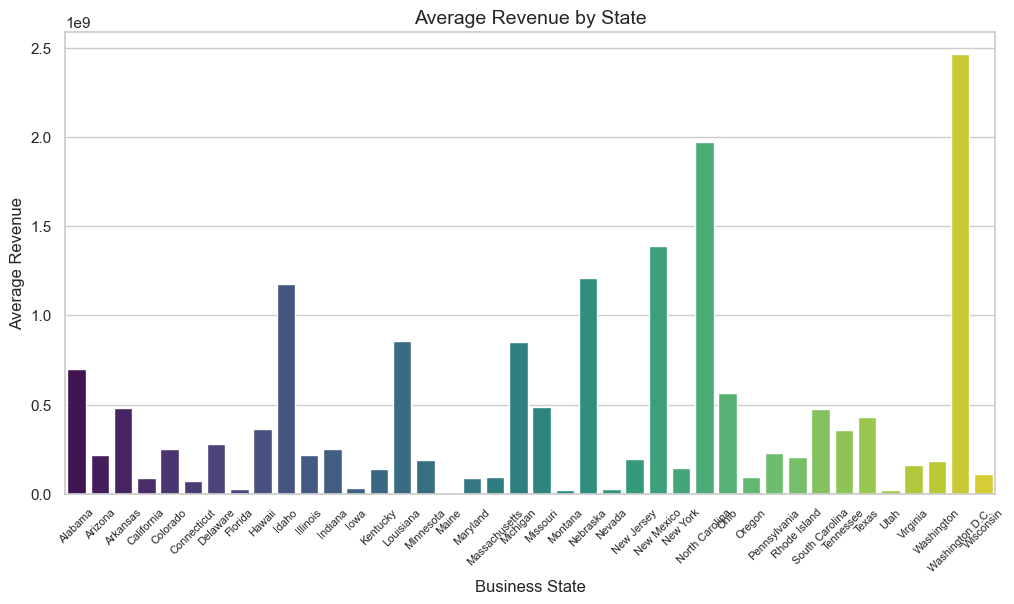

In [67]:
# Average revenue by state
plt.figure(figsize=(12,6))
plt.tight_layout()
sns.barplot(data=state_stats, 
            x="Business State", 
            y=("Total Revenue", "mean"),
            palette="viridis")
plt.title("Average Revenue by State", fontsize=14)
plt.xticks(rotation=45, fontsize=8)
plt.ylabel("Average Revenue")
plt.show()

## **Visualization 2 - Debt-to-Equity distribution by State (boxplot)**

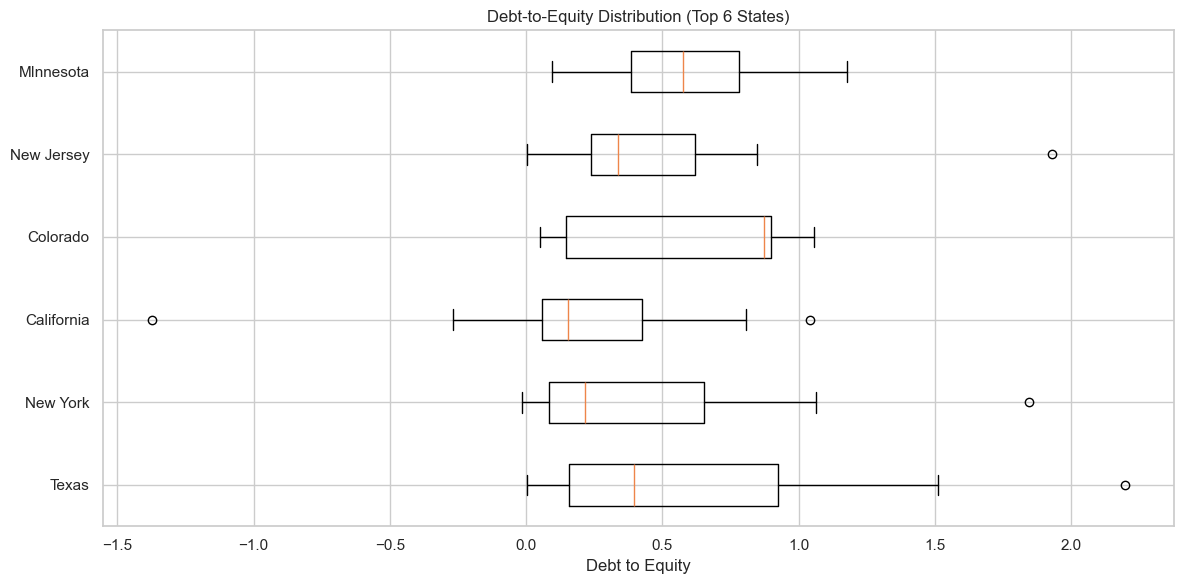

In [68]:
# Debt-to-Equity distribution boxplot for top states by count
top_states = df["Business State"].value_counts().head(6).index
subset = df[df["Business State"].isin(top_states)]
plt.figure(figsize=(12,6))
data = [subset[subset["Business State"]==s]["Debt to Equity"].dropna() for s in top_states]
plt.boxplot(data, labels=top_states, vert=False)
plt.title("Debt-to-Equity Distribution (Top 6 States)")
plt.xlabel("Debt to Equity")
plt.tight_layout()

## **Visualization 3 – Distribution of Debt-to-Income Ratios**

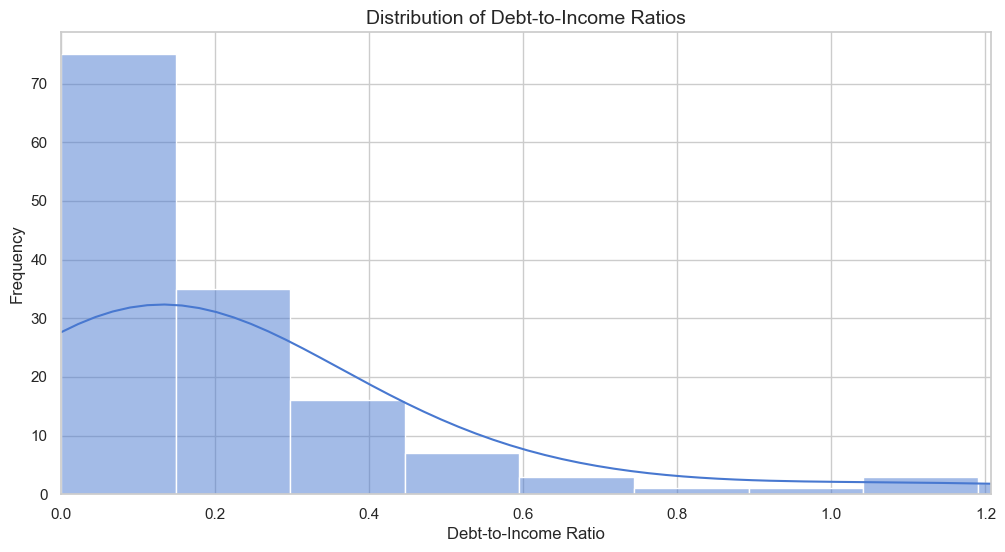

In [69]:
# Distribution of Debt-to-Income Ratios
plt.figure(figsize=(12,6))
sns.histplot(df["Debt-to-Income Ratio"], bins=30, kde=True)
plt.title("Distribution of Debt-to-Income Ratios", fontsize=14)
plt.xlabel("Debt-to-Income Ratio")
plt.xlim(0, df["Debt-to-Income Ratio"].quantile(0.95)) # Limit x-axis to 95th percentile for better visualization
plt.ylabel("Frequency")
plt.show()

## **Visualization 4 – Average Debt-to-Income Ratio by State**

Text(0, 0.5, 'State')

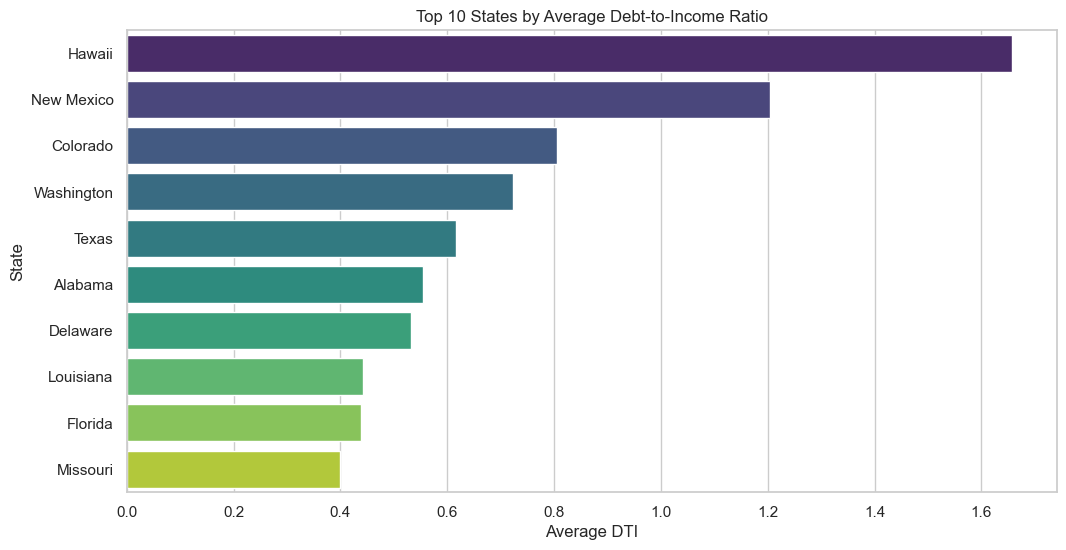

In [70]:
# 2. Average Debt-to-Income Ratio by State (Top 10 states for readability)
plt.figure(figsize=(12,6))
state_dti = df.groupby("Business State")["Debt-to-Income Ratio"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=state_dti.values, y=state_dti.index, palette="viridis")
plt.title("Top 10 States by Average Debt-to-Income Ratio")
plt.xlabel("Average DTI")
plt.ylabel("State")

# **Task 3.1 - Viz Explanation**

### **Visualization 1 – Average Revenue by State (Bar Chart)**

This chart shows the mean revenue generated by companies in each state, allowing us to quickly compare business performance across geographic regions. States with higher average revenues reflect stronger markets or the presence of larger companies, while those with lower averages may indicate smaller-scale businesses or weaker economic environments. For fund managers, this visualization helps identify which states are driving the majority of returns and which states might carry more risk due to weaker revenues. For example, if a few states dominate revenue generation, the portfolio could be overly concentrated in those regions, suggesting diversification may be necessary to balance exposure.

---

### **Visualization 2 – Debt-to-Equity Ratio Distribution by State (Boxplot)**

This visualization presents the spread of debt-to-equity (D/E) ratios across companies within each state, highlighting the level of financial leverage businesses are taking on. The boxplot allows us to identify states where companies are consistently conservative (low D/E) versus states where companies are more leveraged (high or variable D/E). Outliers in the chart can highlight companies with extreme borrowing practices, which may increase financial risk. This insight is valuable because states with more stable and balanced D/E distributions are likely to have healthier companies overall, whereas states with wide spreads or extreme values may indicate higher volatility or risk in those markets.

---

### **Visualization 3 – Distribution of Debt-to-Income Ratios (Histogram/Density Plot)**

The histogram of debt-to-income (DTI) ratios shows the overall financial burden of long-term debt relative to revenue for all companies in the dataset. By analyzing this distribution, we can see whether most companies carry sustainable debt levels or whether there is a significant cluster of firms with dangerously high ratios. If the majority of businesses are concentrated at lower ratios, this suggests that debt is being managed effectively across the portfolio. However, a heavy right tail (many companies with high DTI ratios) could signal credit risk within the portfolio, as businesses with high debt obligations relative to revenue are more vulnerable to downturns. This visualization provides fund managers with a quick diagnostic of financial stability across the portfolio.

---

### **Visualization 4 – Average Debt-to-Income Ratio by State (Bar Chart)**

This chart aggregates the debt-to-income ratio by state, showing how heavily indebted businesses are on average within each region. States with higher average DTI ratios may represent riskier markets, where companies rely more heavily on debt financing compared to their revenue-generating capacity. Conversely, states with lower ratios suggest more stable financial positions. Comparing states side by side enables fund managers to assess which regions may contribute more financial risk to the equity fund. If the portfolio is heavily weighted toward states with higher DTI averages, the managers may want to rebalance by either diversifying into lower-risk regions or applying stricter screening for companies in debt-heavy states.
